# Root finding methods

by Xiaofeng Liu, Ph.D., P.E.
Associate Professor

Department of Civil and Environmental Engineering

Institute of Computational and Data Sciences

Penn State University

223B Sackett Building, University Park, PA 16802

Web: http://water.engr.psu.edu/liu/

---

This notebook is an introduction to root finding methods.

The objectives of this chapter are to:
* understand what roots problems are and where they occur in engineering and science
* know equation classification
* understand the incremental search method and its shortcomings
* know how to solve a roots problem with the bisection method
* know how to estimate the error of bisection
* recognize the difference between bracketing and open methods 
* know how to solve a roots problem with the Newton-Raphson method 
* know how to solve a roots problem with the secant methods
* know Built-in Python functions for root finding 
---

What equations? By definition, we are seeking the roots of algebraic equations. The following figure is a classification of algebraic equations.

<img src="equation_classification.png" alt="equations" width="400"/>

Some of these equations have analytical solutions, for example linear, quadratic, and even cubic equations. However, in many other engineering applications, the equations are general nonlinear and have no easy way to find analytical solutions. 

* Linear equation: independent variable raised to first power only
    * Standard form: $f(x) = ax + b = 0$ $(a!=0)$
    * Examples: $7x -6 =0$; $x/3 = -8$; $8x – 3 = 5x + 4$, all can be rearranged to the standard form: $ax + b = 0$
    * Linear equations with 1 independent variable can be solved exactly and analytically. They have 1 real root.


* Nonlinear: all other algebraic equations
    * Independent variables raised to other powers: $x^2$, $x^{1/2}$
    * Nonlinear functions: $\sin(x)$, $\log(x)$
    * Can have multiple roots or no roots
    * Can have real and imaginary roots
    * Analytical solution may not exist, except in special cases
    
### Polynomial vs General Nonlinear
* Polynomial: contain natural powers (0, 1, 2, 3 ...) and constants
    * Standard form: $f(x) = a_n x_n + a_{n-1} x_{n-1} + a_{n-2} x_{n-2} + ... +a_1 x + a_0$, where $a_0$ to an are constants.
    * Example: $6x^2 – 3/x = 11x +4$
    * Order: the highest power when in standard form
    * Order defines the maximum number of real roots. A nth order polynomial has at most n real roots.
    * Special case: 2nd order polynomial (quadratic equations), solution can be found exactly and analytically
    * Higher order polynomials generally must be solved numerically or graphically
* General Nonlinear
    * Everything else: e.g., non integer powers, nonlinear functions
    * No general classification of the number of roots
    * Solved numerically

### Algorithmic Root Finding

* Algorithmic root finding: perform numerical estimation of solutions to problems.
* It is important to establish a prior: how accurate the solution needs to be.
    * Tolerance or error criterion: the level of error in solution that is acceptable
* Numerical methods for root finding use the prior to iteratively solve for roots
    * Estimate root, check if error < tolerance, if yes we found the root, if no repeat
    * The algorithm is said to converge to a solution if the error trends smaller with progressive estimation steps.
    * Solutions can also diverge or oscillate.
    * Error of each estimate step can be measured as
        * $|f(x)|$: how far away from 0 is $f(x)$, if $x$ is a root, $f(x)$ should approach to 0
        * $|(x_{i+1}-x_i)/x_{i+1}|$: relative error, if the algorithm converges, this should approach to 0
        
### Root finding methods

* Graphical method
* Bracketing methods
    * Bisection method
* Open methods
    * Newton-Raphson method
    * Secant method
    
<img src="root_finding_methods.png" width="600"/>    
    
Questions to keep in mind when considering different root finding methods: 
* How accurate is the method? 
* How expensive is it? 
* How many guess are needed?



In [4]:
#Do not change this cell. It is for setting up things.

%matplotlib inline

#import the preamble in the parent directory
import sys
sys.path.append("../../")
import preamble

## Graphical method

* Make a plot of the function f(x) and observe where it crosses the x-axis.
* Graphing the function can also indicate where roots may be and where some root-finding methods may fail:
    * Same sign, no roots (a)
    * Different sign, one root (b)
    * Same sign, two roots (c)
    * Different sign, three roots (d)



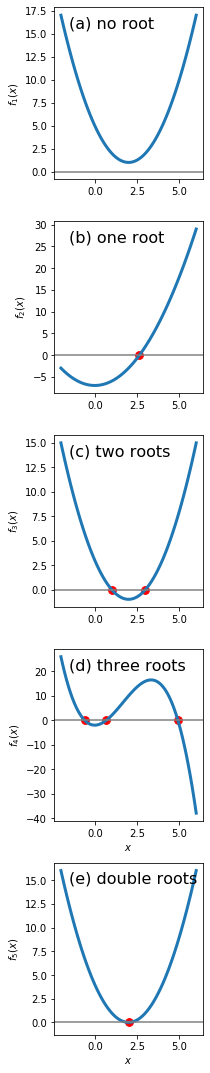

In [5]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

#define the polynomial function whose coefficients
#are optional parameters
def fun1(x):
    return  (x-2) ** 2 + 1.0

def fun2(x):
    return  x ** 2 - 7.0

def fun3(x):
    return  (x-2) ** 2 - 1.0

def fun4(x):
    return  -(x)**3 + 5.0*x**2-2

def fun5(x):
    return  (x-2) ** 2

#find the roots with the "root" function in scipy
#sol1 = optimize.root(fun1,[-0.5, 1.0, 2.5])  #initial guesses are x=-0.5, 1.0, and 2.5. 
#print(sol1.x)
#print(fun(sol1.x))
sol2 = optimize.root(fun2,[2.0])  
sol3 = optimize.root(fun3,[1.0, 3.0])  
sol4 = optimize.root(fun4,[-1.0, 1.0, 5.0])  
sol5 = optimize.root(fun5,[2.0]) 

fig, ax = plt.subplots(5,1,figsize=(3,15))

#plot the function
x = np.linspace(-2, 6, 100)
ax[0].plot(x, fun1(x), label=r'$f_1(x)$', lw=3)
ax[0].set_ylabel(r"$f_1(x)$")
ax[0].axhline(0, color='gray', lw=1.5)

ax[1].plot(x, fun2(x), label=r'$f_2(x)$', lw=3)
ax[1].axhline(0, color='gray', lw=1.5)
ax[1].set_ylabel(r"$f_2(x)$")

ax[2].plot(x, fun3(x), label=r'$f_3(x)$', lw=3)
ax[2].axhline(0, color='gray', lw=1.5)
ax[2].set_ylabel(r"$f_3(x)$")

ax[3].plot(x, fun4(x), label=r'$f_4(x)$', lw=3)
ax[3].axhline(0, color='gray', lw=1.5)
ax[3].set_xlabel(r"$x$")
ax[3].set_ylabel(r"$f_4(x)$")

ax[4].plot(x, fun5(x), label=r'$f_5(x)$', lw=3)
ax[4].axhline(0, color='gray', lw=1.5)
ax[4].set_xlabel(r"$x$")
ax[4].set_ylabel(r"$f_5(x)$")

#plot the roots as scatter
#ax[0].scatter(sol1.x, fun(sol1.x), color="red",s=60, label=r'roots')
ax[1].scatter(sol2.x, fun2(sol2.x), color="red",s=60, label=r'roots')
ax[2].scatter(sol3.x, fun3(sol3.x), color="red",s=60, label=r'roots')
ax[3].scatter(sol4.x, fun4(sol4.x), color="red",s=60, label=r'roots')
ax[4].scatter(sol5.x, fun5(sol5.x), color="red",s=60, label=r'roots')

ax[0].text(0.1, 0.95, '(a) no root', transform=ax[0].transAxes, fontsize=16, va='top')
ax[1].text(0.1, 0.95, '(b) one root', transform=ax[1].transAxes, fontsize=16, va='top')
ax[2].text(0.1, 0.95, '(c) two roots', transform=ax[2].transAxes, fontsize=16, va='top')
ax[3].text(0.1, 0.95, '(d) three roots', transform=ax[3].transAxes, fontsize=16, va='top')
ax[4].text(0.1, 0.95, '(e) double roots', transform=ax[4].transAxes, fontsize=16, va='top')


plt.tight_layout()

plt.show()

## Bracketing methods

* Make two initial guesses that “bracket” the root - that is, are on either side of the root.
* Brackets are formed by finding two guesses $x_l$ and $x_u$ where the sign of the function changes; that is, where $f(x_l) \times f(x_u )$ < 0
* The incremental search method tests the value of the function at evenly spaced intervals and finds brackets by identifying function sign changes between neighboring points.

The incremental search method, though simple, has severe drawbacks. If the spacing between the points of an incremental search are too far apart, brackets may be missed due to capturing an even number of roots within two points.

Incremental searches cannot find brackets containing even-multiplicity roots regardless of spacing.


## Bisection method

* An incremental search method in which the interval is always divided in half.
* If a function changes sign over an interval, the function value at the midpoint is evaluated.
* The location of the root is then determined as lying within the subinterval where the sign change occurs.
* The absolute error is reduced by a factor of 2 for each iteration.

The algorithm can be described with the following figure. 
<img src="bisection.pdf" alt="bisection" width="400"/>

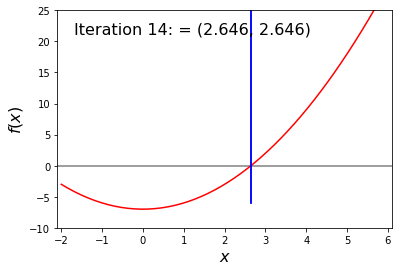

In [6]:
#Note: this cell needs the "ffmpeg" package
#https://anaconda.org/conda-forge/ffmpeg
#ffmpeg on anaconda can be installed with
# conda install -c conda-forge ffmpeg 

import matplotlib.pyplot as plt 
from matplotlib import animation
import numpy as np 
from IPython.display import HTML

#a function return the sign of x
def sgn(x):
    if x > 0:
        return 1
    elif x < 0:
        return -1
    else:
        return 0

#bisect the range (a, b) based on the signs
#of f(a), f(b) and f((a+b)/2)
def bisect(f,a,b):
    fa = f(a)
    fb = f(b)
    p = (a+b)/2.0
    fp = f(p)
    if sgn(fa) == sgn(fp):
        return p, b
    else:
        return a, p

#call the bisection method for n iterations
def bisection_iterations(f,a,b,n):
    for i in range(n):
        a,b = bisect(f,a,b)
    return a,b

def f(x):
    return x**2-7.0

xmin, xmax = 1, 6
yrange = f(xmin), f(xmax)
ymin, ymax = min(yrange), max(yrange) 
vf = np.vectorize(f)
x = np.linspace(-2.0,6.0)
y = vf(x)
epsilon = 0.1

# Initialize figure
fig = plt.figure()
ax = plt.axes(xlim=(-2-epsilon,6+epsilon), ylim=(-10,25))
plt.axhline(0, color='gray', lw=1.5)
plt.xlabel(r'$x$',fontsize=16)
plt.ylabel(r'$f(x)$',fontsize=16)
curve, = ax.plot([],[], color='red')
left, = ax.plot([],[],color='blue')
right, = ax.plot([],[],color='blue')
txt = ax.text(0.05, 0.95, ' ', transform=ax.transAxes, fontsize=16, va='top')

# Figure reset between frames
def init():
    left.set_data([],[])
    right.set_data([],[])
    curve.set_data([],[])
    txt.set_text('')
    return left, right, curve, txt

# Animation of bisection
def animate(i):
    a, b = bisection_iterations(f,xmin,xmax,i)
    left.set_data([a,a],[ymin,ymax])
    right.set_data([b,b],[ymin,ymax])
    curve.set_data(x,y)
    txt.set_text('Iteration %d: = (%.3f, %.3f)' % (i, a, b))
    return left, right, curve, txt

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=15, interval=700, blit=True)

#save the animation to file
# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=1, metadata=dict(artist='Me'), bitrate=5400)
anim.save('bisection_method.mp4', writer=writer)

In [7]:
#show the animation generated from the cell above.
HTML(anim.to_html5_video())

### Error and accuracy of bisection method

* The absolute error of the bisection method is solely dependent on the absolute error at the start of the process (the space between the two guesses) and the number of iterations:

    Initial error:
\begin{equation}
   \Delta x^0 = x_u^0 -x_l^0
\end{equation}

    After $n$ iterations, the error becomes
\begin{equation}
     E_a^n = \frac{\Delta x^0}{2^n}
\end{equation}

* The required number of iterations to obtain a desired absolute error $E_{a,d}$ can be calculated based on the initial guesses:

\begin{equation}
   n = \frac{\Delta x^0}{E_{a,d}}
\end{equation}


Does the bisection method for a double root? Why?

The bisection method is kind of "brute-force" which does not take into considerations on the properties of the function except the sign of on the two bounds of the bracket. It thus may not be efficient. An alternative method, which takes into account the value of $f(a)$ and $f(b)$. Intuitively, for example, if $f(a)$ is closer to zero, then the real root may be closer to $a$ than $b$. And vice versa. This alternative is called the false-position method where the curve of the function on the bracket is approximated as a straight line. The intersection of the straight line with the $x$ axis is the new (and hopefully better) estimate for $x_r$ (instead of $x_r=(a+b)/s$ in the bisection method).

[//]: <> (Add the scheme diagram of the false-position method.)

The performance of the false-position method is usually superior than the bisection method. However, the statement can not be generalized because there are always exceptions. The weakness of the false-position method lies in the fact that it is one-sided, i.e., one end of the bracketing points may stay fixed. 

## Open methods

* Open methods require only a single starting value or two starting values that do not necessarily bracket a root.
* Open methods may diverge as the computation progresses, but when they do converge, they usually do so much faster than bracketing methods.


## Newton's method

* Start with a guess $x$
* Form the tangent line to the $f(x)$ curve at the guess $x$
* Follow the tangent line to where it crosses the x-axis. The crossing point is usually an improved estimate of the root. 

The Newton method or Newton-Raphson method can be derived from Taylor series expansion or from the following graph. At a given point $x_i$, the derivative of the function can be approximated as 
\begin{equation}
   f'(x_i) = \frac{f(x_i) - 0}{x_i - x_{i+1}}
\end{equation}
thus we can re-arrange this equation to get formula for $x_{i+1}$, hopefully an improved estimate of the root:
\begin{equation}
  x_{i+1} = x_i - \frac{f(x_i)}{f'(x_i)}
\end{equation}
This is the iterative formula for the Newton's method, which needs an initial guess to start with and at every iteration, it needs to evaluate the function value and its derivative. 

<img src="Newton_method.png" alt="Newton" width="400"/>

The whole process can be illustrated with the following interactive plot. Use your mouse to drag the iteration slider slowly and see how the tangent line and crossing point evolve toward the root. 

In [8]:
#source: https://github.com/markjay4k/fourier-transform

import numpy as np
from scipy.misc import derivative
import matplotlib.pyplot as plt
from ipywidgets import widgets
%matplotlib nbagg

x = np.linspace(0.2, 2.2, 500)

def f(x):
    return np.log(x)

def f_line(f, x, x_n):
    slope = derivative(f, x_n, dx=0.1)
    x_nn = x_n - f(x_n) / slope 
    return slope * (x - x_n) + f(x_n), x_nn

def update_plot(order):
    x_n = 2
    ax.clear()
    ax.plot(x, f(x), label=r'$\ln(x)$')
    ax.axhline(0, color='gray', lw=0.5)

    for i in range(0, order):

        if i >= 1:
            ax.plot(x, f_l, '--', lw=1)
        
        ax.plot(x_n, f(x_n), 'kd', label=r'$f(x_{}={:.2f})={:.3f}$'.format(i + 1, x_n, f(x_n)))
        ax.vlines(x_n, 0, f(x_n), color='black', linestyle=':', lw=1)
        f_l, x_n = f_line(f, x, x_n)

        
    plt.setp(ax, xticks=[0, 1, 2], xticklabels=['0', '1', '2'],
             yticks=[-1, 0, 1], yticklabels=['-1', '0', '-1'])
    ax.set_ylim(-1, 1)
    ax.set_xlim(0, 2.2)
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$f(x)$')
    ax.legend(loc=4)
    plt.show()

<IPython.core.display.Javascript object>


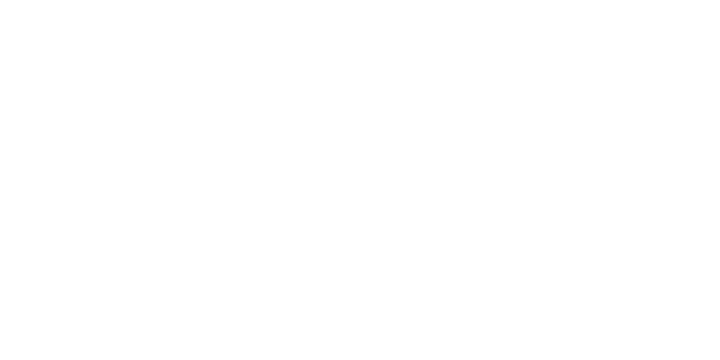

interactive(children=(IntSlider(value=1, description='Iterations', max=6, min=1), Output()), _dom_classes=('wi…

<IPython.core.display.Javascript object>


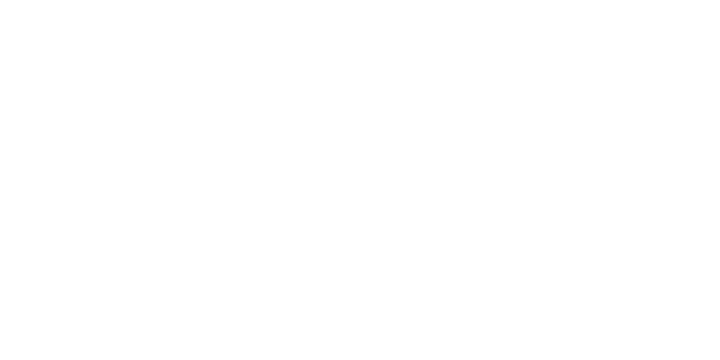

In [9]:
fig, ax = plt.subplots(1, figsize=(10, 5))
order = widgets.IntSlider(min=1, max=6, value=1, description='Iterations')
widgets.interactive(update_plot, order=order)

A more concise example of Newton-Raphson implementation is as follows. To use it for your own problem, you need to redefine the function and its derivative.

In [10]:
#define the function
def f(x):
    return x**2-16.0
 
#define the derivative
def df(x):
    return 2.0*x
 
def Newton_Raphson_method(f, x0, eps):
    delta = abs(0-f(x0))
    while delta > eps:
        x0 = x0 - f(x0)/df(x0)
        delta = abs(0-f(x0))
    print('Found a root at: ', x0, ' with f(x) = ', f(x0))

#now use the Newton-Raphson method
eps = 1e-6      #absolute convergence tolerance
x0s = [-3, 5]   #initial guesses (should be reasonable)
for x0 in x0s:
    Newton_Raphson_method(f, x0, 1e-6)

Found a root at:  -4.000000000000241  with f(x) =  1.9255708139098715e-12
Found a root at:  4.000000000000004  with f(x) =  3.552713678800501e-14


One can show the Newtons-Raphson method is quadratic convergent or second order if the initial guess is "close" to the real root:
\begin{equation}
   E_{i+1} = -\frac{f''(x_r)}{2f'(x_r)} E_i^2
\end{equation}
where $E_i$ and $E_{i+1}$ are the error in the previous and current iteration, respectively. $f''(x_r)$ is the second-order derivative of the function at $x_r$.

Although the Newtons-Raphson method has a second order convergence rate, we need to note the following:
* it needs the evaluation of the derivative.
* some functions show slow or poor convergence, oscillation, or divergence. 
* it will fail if at any point the derivative $f'(x_i)$ is zero or very small value. Zero derivative happens when the root is a multiple root. For example, the root of $x=2$ for $f(x)=(x-2)^2=0$. 

You can try the code above to solve the following problems:
* slower convergence: find the positive root of $f(x)=x^{12}-1=0$ with an initial guess of $x_0$ = 0.6.
* divergence (oscillation): find the root of $f(x) = x^5-x+1=0$ with an initial guess of $x_0$ = -0.5.
* divergence: find the root of $f(x)=(x-1)^{1/3}=0$ with an initial guess of $x_0$ = 0.5.

The code above does not have a limit on the number iterations. For a divergent case, it is required to add a check on the maximum number of iterations. Otherwise, the code might enter a dead loop. 

## The Secant method

One of the drawbacks of the Newton-Raphson method is the need to calculate the derivative. For some functions, it may not be convenient or cheap to evaluate the derivative. In other cases, the function and thus its derivative may not have an explicit functional form. An alternative here is to approximate the derivative using finite difference with the values from previous two iterations:
\begin{equation}
f'(x_i) \approx \frac{f(x_{i-1}) - f(x_i)}{x_{i-1}-x_i}
\end{equation}
and thus the iterative formula to update the root estimate is
\begin{equation}
 x_{i+1} = x_i - \frac{f(x_i) (x_{i-1}-x_i)}{f(x_{i-1}) - f(x_i)}
\end{equation}

To start the Secant method, one needs two (different) initial guesses. 

## Comparison among different root finding methods


| Method | Type | Guesses | Convergence | Stability | Programming | Comments |
|---|---|---|---|---|---|---|
| Graphical | Visual | N/A | N/A | N/A | N/A | Imprecise |
| Bisection | Bracketing | 2 | Slow | Stable | Easy |  |
| False-Position | Bracketing | 2 | Fast (with exceptions) | Stable | Easy |  |
| Newton-Raphson | Open | 1 | Fast | May diverge | Easy | Requires evaluation of $f'(x)$ |
| Secant | Open | 2 | Medium/Fast | May diverge | Easy | Initial guesses do not have to bracket the root |


## Python built-in root finding functions and capabilities

* Numpy's "roots(...)" function for the roots of polynomials:

* [SciPy (Scientific Python)](https://www.scipy.org): a Python library for scientific computing and technical computing. Note that when you study SciPy, you may encounter another library named "ScientificPython" which is totally a different one (not actively developed anymore). SciPy is a software ecosystem which contains modules for common computational tasks in science and engineering, such as optimization, linear algebra, integration, interpolation, special functions, FFT, signal and image processing, and solving ODEs. It sounds like it covers all the topics we will cover in this course. However, again, in order to understand what is going on under the hood, we need to know the fundamentals and theories.

    The Numpy module is in fact part of SciPy. Indeed, SciPy is built based on the Numpy array objects. In addition to Numpy, SciPy's main modules also include SciPy core library for scientific computing, Matplotlib for plotting, IPython for interactive console, Sympy for symbolic mathematics, and pandas for data structure and analysis. 

    SciPy (current version 1.2 as of Jan. 2019) implements the following bracketing root finding methods: bisection (slowest among all, but guaranteed to converge),  Brent’s method, and Ridder’s method. For derivative-based method, they are all based on Newont's method, converges more quickly if the initial guess is close to the root. All these implementations are in the "optimize" module 

    In addition, SciPy also implements "root(...)" and "fsolve(...)" functions to find a root of a vector function in multidimensional space.

    The following is an example on how to use SciPy to find the roots of the cubic polynomial:
    \begin{equation}
    f(x) = 2.0 x^3 - 6x^2+x+2.5
    \end{equation}

<IPython.core.display.Javascript object>


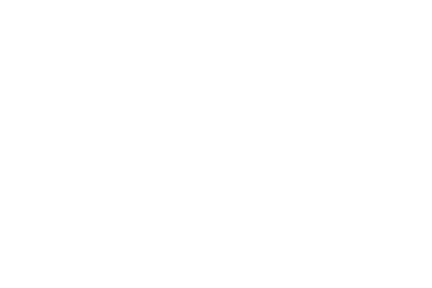

<IPython.core.display.Javascript object>


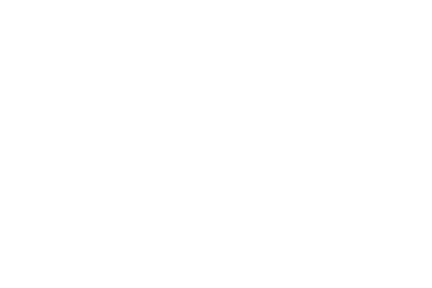

In [11]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

#define the polynomial function whose coefficients
#are optional parameters
def fun(x, a=2.0, b=-6, c=1, d=2.5):
    return a * x ** 3 + b * x ** 2 + c * x + d

def show_function_plot():
    x = np.linspace(-1, 3, 100)
    plt.plot(x, fun(x), label=r'$f(x)$', lw=3)
    plt.xlabel(r"$x$")
    plt.ylabel(r"$f(x)$")
    plt.axhline(0, color='gray', lw=1.5)
    plt.yticks([-10, 0 , 10])
    plt.legend()
    plt.xlim(-1,3)
    plt.ylim(-10, 10)
    plt.show()
    
#plot the function to have an idea on where the roots are approximately    
show_function_plot()

[-0.52854363  0.89959512  2.62894851]
[-2.46469511e-13 -2.31814568e-13 -1.21236354e-12]


<IPython.core.display.Javascript object>


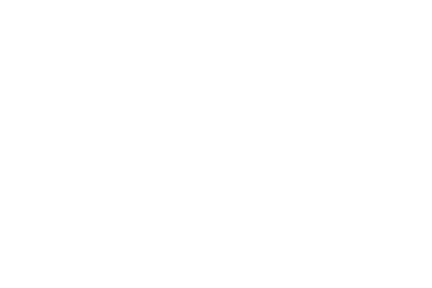

<IPython.core.display.Javascript object>


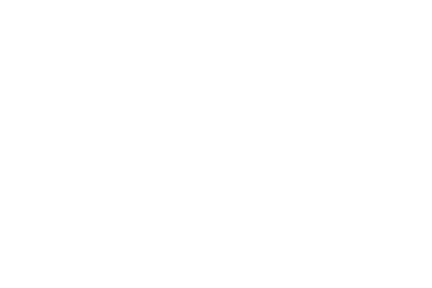

In [12]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

#define the polynomial function whose coefficients
#are optional parameters
def fun(x, a=2.0, b=-6, c=1, d=2.5):
    return a * x ** 3 + b * x ** 2 + c * x + d

#find the roots with the "root" function in scipy
sol = optimize.root(fun,[-0.5, 1.0, 2.5])  #initial guesses are x=-0.5, 1.0, and 2.5. 
print(sol.x)
print(fun(sol.x))

#plot the function
x = np.linspace(-1, 3, 100)
plt.plot(x, fun(x), label=r'$f(x)$', lw=3)
plt.xlabel(r"$x$")
plt.ylabel(r"$f(x)$")
plt.axhline(0, color='gray', lw=1.5)
plt.yticks([-10, 0 , 10])
plt.xlim(-1,3)
plt.ylim(-10, 10)

#plot the roots as scatter
plt.scatter(sol.x, fun(sol.x), color="red",s=60, label=r'roots')

plt.legend()

plt.show()

The following example originally come from
https://sites.google.com/a/aims-senegal.org/scipy/roots-finding-numerical-integrations-and-differential-equations

In [13]:
#use Numpy's roots(...) function
p = [2,-6,1,2.5]
np.roots(p)

array([ 2.62894851,  0.89959512, -0.52854363])

In [14]:
def f(x):
    y = x + 2*np.cos(x)
    return y
         
#directly call SciPy optimize's bisect method
sol1=optimize.bisect(f, -2, 2)        # starting interval [-2, 2]

#directly call SciPy optimize's newton method
sol2=optimize.newton(f,  2)      # starting point x0 = 2

#use fsolve(...) function
sol3 = optimize.fsolve(f, 0.3) 

print(sol1)
print(sol2)
print(sol3[0])

-1.0298665293212252
-1.0298665293222615
-1.029866529322259


optimize's fsolve(...) can be used to solve a set of non-linear equations.

In [15]:
def func2(x):
        y = [x[0]*np.cos(x[1]) - 4, x[1]*x[0] - x[1] - 5]
        return y

sol4 = optimize.fsolve(func2, [1, 1])
print(sol4)

[6.50409711 0.90841421]
